0    99.827251
1     0.172749
Name: Class, dtype: float64


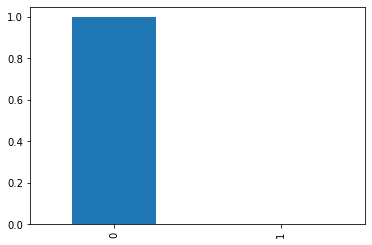

In [21]:
import pandas as pd
import warnings

warnings.filterwarnings(action='ignore')

# dataset : Kaggle의 Credit Card Fraud Detection의 creditcard.csv 
df = pd.read_csv('datasets/creditcard.csv')

# Class 별 데이터분포
df.Class.value_counts(normalize=True).plot(kind='bar')
print(df.Class.value_counts(normalize=True)*100)

In [22]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Original dataset으로 독립변수(X)와 종속변수(y) 지정
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Original dataset에 대한 training set과 test set 구분 (3:1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [24]:
# imblearn(imbalanced data 문제해결을 위한 패키지) import
from imblearn.over_sampling import SMOTE

# SMOTE 모델 설정
smote = SMOTE(random_state=0)

# SMOTE 기법에 의한 Oversampling 진행
X_over,y_over = smote.fit_sample(X,y)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X.shape, y.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_over.shape, y_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_over).value_counts())

# Oversampling dataset에 대한 training set과 test set 구분 (3:1)
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.25, random_state=10)

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (284807, 30) (284807,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (568630, 30) (568630,)
SMOTE 적용 후 레이블 값 분포: 
 1    284315
0    284315
Name: Class, dtype: int64


In [25]:
# 모델링 및 학습/검증
def f_model_fit(cls, model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    f_metrics(cls, y_test,pred)
    
# 분류 성능평가 지표
def f_metrics(cls, y_test,pred):
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print(cls + '정확도 : {0:.3f}, 정밀도 : {1:.3f}, 재현율 : {2:.3f}, f1-score : {3:.3f}'.format(accuracy, precision, recall, f1))

In [26]:
# 분석기법 : Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
f_model_fit('Logistic Regression(SMOTE적용 전) -> ', lr, X_train, X_test, y_train, y_test)
f_model_fit('Logistic Regression(SMOTE적용 후) -> ', lr, X_train_over, X_test_over, y_train_over, y_test_over)

Logistic Regression(SMOTE적용 전) -> 정확도 : 0.999, 정밀도 : 0.721, 재현율 : 0.661, f1-score : 0.690
Logistic Regression(SMOTE적용 후) -> 정확도 : 0.974, 정밀도 : 0.983, 재현율 : 0.964, f1-score : 0.973


In [27]:
# 분석기법 : Decision_tree Classification
from sklearn.tree import DecisionTreeClassifier  # 의사결정트리 기법에 관련된 모듈

decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
f_model_fit('Decision_tree(SMOTE적용 전) -> ', decision_tree, X_train, X_test, y_train, y_test)
f_model_fit('Decision_tree(SMOTE적용 후) -> ', decision_tree, X_train_over, X_test_over, y_train_over, y_test_over)

Decision_tree(SMOTE적용 전) -> 정확도 : 0.999, 정밀도 : 0.896, 재현율 : 0.785, f1-score : 0.837
Decision_tree(SMOTE적용 후) -> 정확도 : 0.964, 정밀도 : 0.982, 재현율 : 0.946, f1-score : 0.963


In [29]:
# 분석기법 : Random_forest Classification
from sklearn.ensemble import RandomForestClassifier  # 랜덤포리스트 기법에 관련된 모듈

random_forest = RandomForestClassifier(n_estimators=20, random_state=0)
f_model_fit('Random_forest(SMOTE적용 전) -> ', random_forest, X_train, X_test, y_train, y_test)
f_model_fit('Random_forest(SMOTE적용 후) -> ', random_forest, X_train_over, X_test_over, y_train_over, y_test_over)

Random_forest(SMOTE적용 전) -> 정확도 : 1.000, 정밀도 : 0.960, 재현율 : 0.802, f1-score : 0.874
Random_forest(SMOTE적용 후) -> 정확도 : 1.000, 정밀도 : 1.000, 재현율 : 1.000, f1-score : 1.000


In [30]:
# 분석기법 : Xgboost Classification
import xgboost as xgb # xgboost 기법에 관련된 모듈

gbm = xgb.XGBClassifier(max_depth=4, n_estimators=300, learning_rate=0.05, eval_metric='logloss')
f_model_fit('XGBoost(SMOTE적용 전) -> ', gbm, X_train, X_test, y_train, y_test)
f_model_fit('XGBoost(SMOTE적용 후) -> ', gbm, X_train_over, X_test_over, y_train_over, y_test_over)

XGBoost(SMOTE적용 전) -> 정확도 : 1.000, 정밀도 : 0.962, 재현율 : 0.835, f1-score : 0.894
XGBoost(SMOTE적용 후) -> 정확도 : 0.997, 정밀도 : 0.997, 재현율 : 0.997, f1-score : 0.997


In [32]:
!pip install lightgbm

In [33]:
# 분석기법 : LightGBM Classification
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
f_model_fit('Lightgbm(SMOTE적용 전) -> ', lgb, X_train, X_test, y_train, y_test)
f_model_fit('Lightgbm(SMOTE적용 후) -> ', lgb, X_train_over, X_test_over, y_train_over, y_test_over)

Lightgbm(SMOTE적용 전) -> 정확도 : 1.000, 정밀도 : 0.952, 재현율 : 0.826, f1-score : 0.885
Lightgbm(SMOTE적용 후) -> 정확도 : 1.000, 정밀도 : 1.000, 재현율 : 1.000, f1-score : 1.000
